# Node identifier: Machine Learning approach

## Preparation

In [62]:
# Set path
path = 'C:/Users/User/Desktop/Assignatures/Synthesis project/GraphAnomaly/dades_arnau/'

In [63]:
import pickle

# Load train and test set
with open(path + 'sequential_train.pkl', 'rb') as f:
    train_set = pickle.load(f)
with open(path + 'sequential_test.pkl', 'rb') as f:
    test_set = pickle.load(f)

In [64]:
from Helper import separate_labels

# Split labels
X_train, y_train, X_test, y_test = separate_labels(train_set, test_set)

## Models

In [65]:
import matplotlib.pyplot as plt  
from sklearn.metrics import *

# Function to display the performance of the Machine Learning classifiers
def plot(name, y_test, y_pred, CM=True):    
    # Except for the accuracy, the others compute the metric for the ilicit class
    print(f"Testing {name}...")
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    precision = round(precision_score(y_test, y_pred, pos_label=0), 4)
    print("Precision: {:.2f}%".format(precision * 100))
    recall = round(recall_score(y_test, y_pred, pos_label=0), 4)
    print("Recall: {:.2f}%".format(recall * 100))
    f1 = round(f1_score(y_test, y_pred, pos_label=0),4)
    print("F1 Score: {:.2f}%\n".format(f1 * 100))

    # Confusion matrix
    if CM:
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ilicit', 'Licit'])
        disp.plot()
        plt.title(name)
        plt.show()

In [66]:
# Function to train multiple models
def train(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plot(model, y_test, y_pred)

Testing DecisionTreeClassifier()...
Accuracy: 92.03%
Precision: 43.51%
Recall: 76.08%
F1 Score: 55.36%



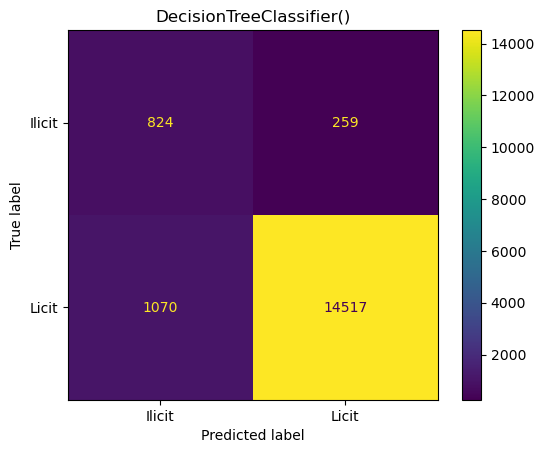

Testing RandomForestClassifier()...
Accuracy: 98.01%
Precision: 96.07%
Recall: 72.30%
F1 Score: 82.51%



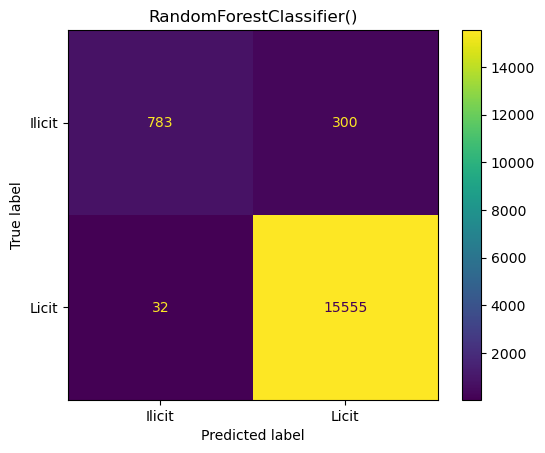

Testing GradientBoostingClassifier()...
Accuracy: 97.21%
Precision: 82.66%
Recall: 72.21%
F1 Score: 77.08%



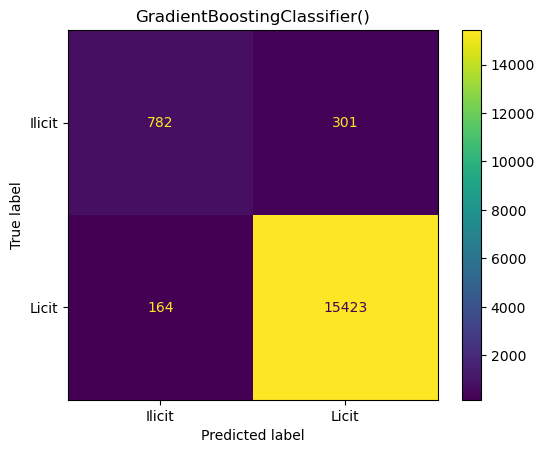

Testing ExtraTreesClassifier()...
Accuracy: 97.95%
Precision: 97.81%
Recall: 70.08%
F1 Score: 81.66%



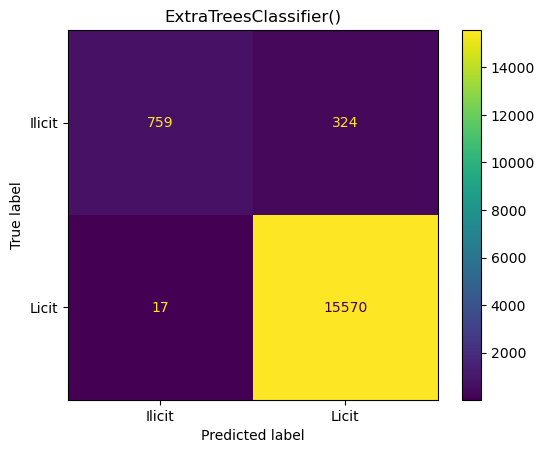

Testing MLPClassifier()...
Accuracy: 93.49%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%



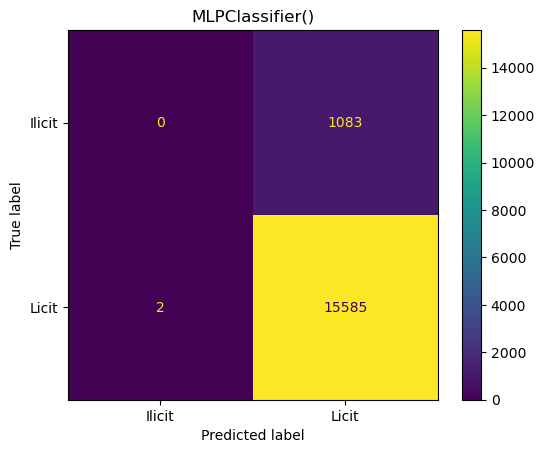

In [52]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import *
from sklearn.neural_network import MLPClassifier

models = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), MLPClassifier()]
train(models, X_train, y_train, X_test, y_test)

In [55]:
# Select random forest as one of the best performing models
# Train
rt = RandomForestClassifier()
rt.fit(X_train, y_train)

RandomForestClassifier()

### Save predictions

In [59]:
# Function to predict a whole dataset using an already trained model
def predict(df, model):
    temp = df.drop(columns=['class'])
    temp = model.predict(temp)  
    df.insert(loc=2, column='prediction', value=temp)    
    return df

In [67]:
# Predict the values of the test set using the random forest 
test_predicted = predict(test_set, rt)

In [68]:
# Now we would only need to save this new dataset
test_predicted

,node,class,prediction,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,...,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
0,56772759,2,1,35,-0.161125,-0.105718,-0.091383,-0.121970,-0.043875,-0.113002,...,1.321029,0.988475,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
1,67603032,2,1,35,-0.161043,-0.060878,1.018602,-0.121970,-0.043875,-0.113002,...,-0.210925,-0.304549,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,54750809,2,1,35,-0.145169,-0.088945,0.463609,-0.121970,-0.043875,-0.113002,...,-0.412695,-0.449620,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,67841095,2,1,35,-0.172858,-0.108048,-0.091383,-0.121970,-0.043875,-0.113002,...,1.193989,0.881249,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
4,70042737,0,0,35,-0.171439,-0.130081,1.018602,-0.121970,-0.043875,-0.113002,...,-0.128722,-0.235168,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67499,158579784,2,1,49,-0.167104,-0.124868,1.018602,-0.121970,-0.043875,-0.113002,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
67500,188612333,2,0,49,-0.172910,-0.081127,-1.201369,-0.121970,-0.063725,-0.113002,...,-0.577099,1.707523,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
67501,41402314,1,1,49,-0.129660,1.247693,1.573595,2.729456,0.214176,2.989901,...,1.356804,1.045663,0.780139,0.575016,-0.098889,0.412346,0.327506,0.109229,-0.725131,-0.420181
67502,158591722,2,1,49,-0.172852,-0.079761,1.018602,-0.046932,-0.043875,-0.029140,...,-0.569626,-0.607306,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
